# Stage 1: Age 
### By Raven Griffin
Using the United States Census Bureau 2020: DEC Demographic Profile dataset which provides ages of people results by state and county. The dataset contains the amount of people who live in a given county broken down by age.

## How can you merge the data with the primary COVID-19 dataset (Focus on the year 2020)? 
- First I transposed my dataset on the Census websited anf filtered on for Nevada counties and age
- I removed the unnessary data because it was not required for the merge
- Then I changed the count values to be on the same row as the county name
- Next I merged the data using an inner merge because I know there are not empty rows
## Identify the individual variable which map between the datasets.
- The 'County Name' variable maps between the datasets. I just needed to have the data on the same row as the county name.
## Describe how your enrichment data can help in the analysis of COVID-19 spread. 
- There are different health risks for different age groups. Knowing who is most likely to die from covid could help keep more people alive. Also knowing the social behaviors of different age groups can indicate who is spreading covid the most
## Pose initial hypothesis questions.
- People age 20-30 are more likely to spread covid because of their social patterns
- Older people (65 and up) are more likely to die from covid


# Calculating the Last Week of 2020 covid cases in Nevada

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read in the file of the merged data, this came from the group task
super_covid = pd.read_csv('super_covid_data.csv')

#filting the data for my state by comparing the State coulmn to my state's abreviations
filtered_data = super_covid[super_covid['State'] == 'NV']


#Finding the Dates but filtering for december 12-25 through 12-31 while also keeping necessay columns
nevada_filter = filtered_data[['countyFIPS', 'County Name', 'State' ,'2020-12-25_confirmed', '2020-12-26_confirmed', '2020-12-27_confirmed', '2020-12-28_confirmed', '2020-12-29_confirmed', '2020-12-30_confirmed', '2020-12-31_confirmed']]
nevada_filter


,countyFIPS,County Name,State,2020-12-25_confirmed,2020-12-26_confirmed,2020-12-27_confirmed,2020-12-28_confirmed,2020-12-29_confirmed,2020-12-30_confirmed,2020-12-31_confirmed
33,0,Statewide Unallocated,NV,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1801,32001,Churchill County,NV,1280.0,1326.0,1326.0,1326.0,1326.0,1361.0,1381.0
1802,32003,Clark County,NV,160569.0,163484.0,163484.0,164673.0,165318.0,166285.0,170032.0
1803,32005,Douglas County,NV,1817.0,1857.0,1857.0,1893.0,1896.0,1907.0,1938.0
1804,32007,Elko County,NV,3720.0,3774.0,3774.0,3775.0,3785.0,3794.0,3862.0
1805,32009,Esmeralda County,NV,30.0,30.0,30.0,32.0,32.0,32.0,32.0
1806,32011,Eureka County,NV,28.0,29.0,29.0,29.0,29.0,29.0,29.0
1807,32013,Humboldt County,NV,754.0,754.0,754.0,754.0,754.0,754.0,813.0
1808,32015,Lander County,NV,375.0,381.0,381.0,382.0,382.0,383.0,384.0
1809,32017,Lincoln County,NV,260.0,260.0,260.0,260.0,271.0,271.0,277.0


In [4]:
#finds the sum of all the cases
case_count = nevada_filter.sum()
case_count

countyFIPS                                                         544774
County Name             Statewide UnallocatedChurchill CountyClark Cou...
State                                NVNVNVNVNVNVNVNVNVNVNVNVNVNVNVNVNVNV
2020-12-25_confirmed                                             208264.0
2020-12-26_confirmed                                             211666.0
2020-12-27_confirmed                                             212238.0
2020-12-28_confirmed                                             213634.0
2020-12-29_confirmed                                             214364.0
2020-12-30_confirmed                                             216077.0
2020-12-31_confirmed                                             220512.0
dtype: object

# Displaying Increase in the Data

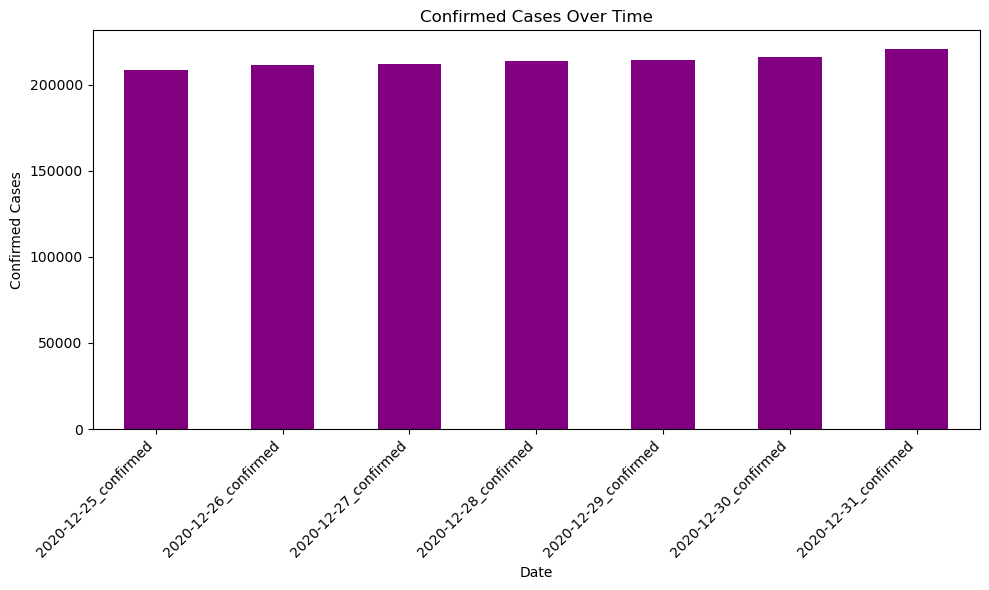

In [8]:
# Creating a Series
data = pd.Series({
    '2020-12-25_confirmed': 208264.0,
    '2020-12-26_confirmed': 211666.0,
    '2020-12-27_confirmed': 212238.0,
    '2020-12-28_confirmed': 213634.0,
    '2020-12-29_confirmed': 214364.0,
    '2020-12-30_confirmed': 216077.0,
    '2020-12-31_confirmed': 220512.0
})

# Plotting the bar graph
plt.figure(figsize=(10, 6))
data.plot(kind='bar', color='purple')
plt.title('Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

# Calculating the Last Week of Covid Deaths in 2020

In [11]:
#Finding the Dates but filtering for december 12-25 through 12-31 while also keeping necessay columns
nevada_filter_deaths = filtered_data[['countyFIPS', 'County Name', 'State' ,'2020-12-25_deaths', '2020-12-26_deaths', '2020-12-27_deaths', '2020-12-28_deaths', '2020-12-29_deaths', '2020-12-30_deaths', '2020-12-31_deaths']]
nevada_filter_deaths

,countyFIPS,County Name,State,2020-12-25_deaths,2020-12-26_deaths,2020-12-27_deaths,2020-12-28_deaths,2020-12-29_deaths,2020-12-30_deaths,2020-12-31_deaths
33,0,Statewide Unallocated,NV,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1801,32001,Churchill County,NV,35.0,35.0,35.0,35.0,35.0,35.0,39.0
1802,32003,Clark County,NV,2244.0,2260.0,2260.0,2261.0,2267.0,2309.0,2379.0
1803,32005,Douglas County,NV,15.0,15.0,15.0,15.0,15.0,15.0,15.0
1804,32007,Elko County,NV,32.0,32.0,32.0,32.0,32.0,33.0,33.0
1805,32009,Esmeralda County,NV,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1806,32011,Eureka County,NV,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1807,32013,Humboldt County,NV,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1808,32015,Lander County,NV,6.0,6.0,6.0,6.0,6.0,7.0,7.0
1809,32017,Lincoln County,NV,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
#finds the sum of all the deaths
death_count = nevada_filter_deaths.sum()
death_count

countyFIPS                                                      544774
County Name          Statewide UnallocatedChurchill CountyClark Cou...
State                             NVNVNVNVNVNVNVNVNVNVNVNVNVNVNVNVNVNV
2020-12-25_deaths                                               2878.0
2020-12-26_deaths                                               2903.0
2020-12-27_deaths                                               2910.0
2020-12-28_deaths                                               2924.0
2020-12-29_deaths                                               2932.0
2020-12-30_deaths                                               2978.0
2020-12-31_deaths                                               3079.0
dtype: object

## Displaying an increase in data

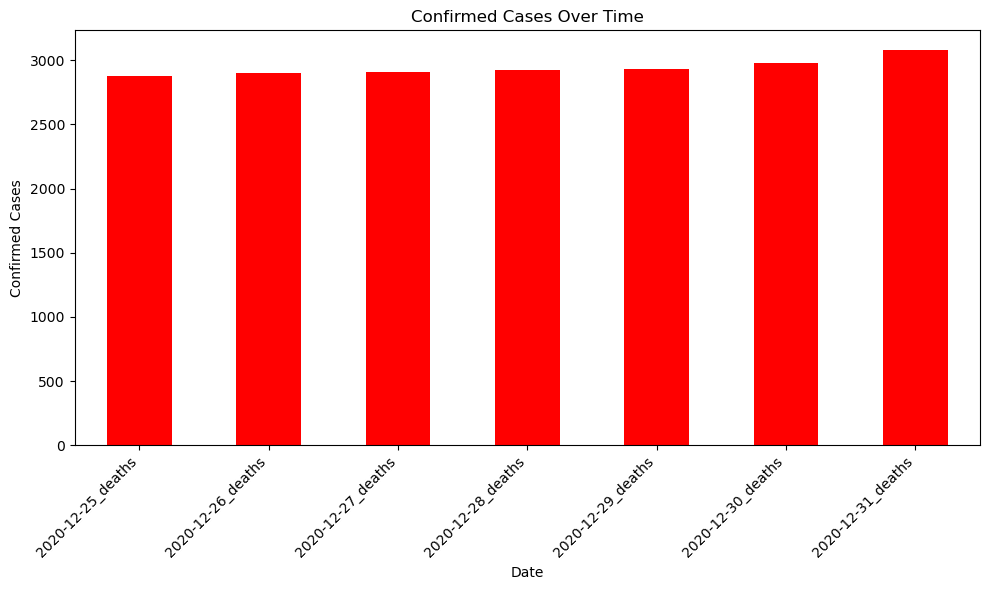

In [16]:
# Creating a Series
data = pd.Series({
    '2020-12-25_deaths': 2878.0,
    '2020-12-26_deaths': 2903.0,
    '2020-12-27_deaths': 2910.0,
    '2020-12-28_deaths': 2924.0,
    '2020-12-29_deaths': 2932.0,
    '2020-12-30_deaths': 2978.0,
    '2020-12-31_deaths': 3079.0
})

# Plotting the bar graph
plt.figure(figsize=(10, 6))
data.plot(kind='bar', color='r')
plt.title('Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

### Are the cases increasing, decreasing, or stable?
- The total number of cases and deaths alike increase during the last week of 2020

In [19]:
var_dict_cases = {
    "Label (Grouping)": {
        "Definition": "Name of the lable",
        "Data type": "String",
        "Possible values": "Varies( e.g., Percent, Count, Elk County, Nevada",
        "Required?": "No"
    },
    "SEX AND AGE!!Total population": {
        "Definition": "Total number of people",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 3,104,614, 25,516, etc.)",
        "Required?": "No"
    },
    "SEX AND AGE!!Total population!!Under 5 years": {
        "Definition": "People ages 5 and under in Nevada",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 174,032 , 1,540, etc.)",
        "Required?": "Yes"
    },
    "SEX AND AGE!!Total population!!5 to 9 years": {
        "Definition": "People age 5-9 in nevada",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 1,659 , 2,248, etc.)",
        "Required?": "Yes"
    },
    "SEX AND AGE!!Total population!!10 to 14 years": {
        "Definition": "People age 10-14 in nevada",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 2,582	, 4,599, etc.)",
        "Required?": "Yes"
    },
    "SEX AND AGE!!Total population!!15 to 19 years": {
        "Definition": "People age 15-19 in nevada",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 1,478	, 143,739	, etc.)",
        "Required?": "Yes"
    },
    "SEX AND AGE!!Total population!!20 to 24 years": {
        "Definition": "People age 20-24 in nevada",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 1,374	, 1,657, etc.)",
        "Required?": "Yes"
    },
    "SEX AND AGE!!Total population!!25 to 29 years": {
        "Definition": "People age 25-29 in nevada",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 1,657	, 160,933, etc.)",
        "Required?": "Yes"
    },"SEX AND AGE!!Total population!!30 to 34 years": {
        "Definition": "People age 30 - 34 in nevada",
        "Data type": "Integer",
        "Possible values": "Varies (1,775	, 164,663	)",
        "Required?": "Yes"
    },
    "SEX AND AGE!!Total population!!35 to 39 years": {
        "Definition": "People age 35-39 in nevada",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 1,474	, 162,382	, etc.)",
        "Required?": "Yes"
    },
    "SEX AND AGE!!Total population!!40 to 44 years": {
        "Definition": "People age 40-44 in nevada",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 1,329	, 151,315	, etc.)",
        "Required?": "Yes"
    },
    "SEX AND AGE!!Total population!!45 to 49 years": {
        "Definition": "People age 45-49 in nevada",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 1,273	, 149,842	, etc.)",
        "Required?": "Yes"
    },
    "SEX AND AGE!!Total population!!50 to 54 years": {
        "Definition": "People age 50-54 in nevada",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 1,478	, 146,463	, etc.)",
        "Required?": "Yes"
    },
    "SEX AND AGE!!Total population!!55 to 59 years": {
        "Definition": "People age 55-59 in nevada",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 1,818	, 142,786	, etc.)",
        "Required?": "Yes"
    },
        "SEX AND AGE!!Total population!!60 to 64 years": {
        "Definition": "People age 60-64 in nevada",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 1,814	, 131,392	, etc.)",
        "Required?": "Yes"
    },
        "SEX AND AGE!!Total population!!65 to 69 years": {
        "Definition": "People age 60-64 in nevada",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 1,611	, 116,279	, etc.)",
        "Required?": "Yes"
    },
      "SEX AND AGE!!Total population!!70 to 74 years": {
        "Definition": "People age 70-74 in nevada",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 1,482	, 98,765	, etc.)",
        "Required?": "Yes"
    },
      "SEX AND AGE!!Total population!!75 to 79 years": {
        "Definition": "People age 75-79 in nevada",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 1,034	, 64,717	, etc.)",
        "Required?": "Yes"
    },
    "SEX AND AGE!!Total population!!80 to 84 years": {
        "Definition": "People age 80-84 in nevada",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 616	, 37,420	, etc.)",
        "Required?": "Yes"
    },
    "SEX AND AGE!!Total population!!85 years and over": {
        "Definition": "People age 85 and older",
        "Data type": "Integer",
        "Possible values": "Varies (e.g., 496	, 1,403	, etc.)",
        "Required?": "Yes"
    }
}

# Convert the var_dict_cases dictionary to a pandas DataFrame
df_var_dict = pd.DataFrame.from_dict(var_dict_cases, orient='index').reset_index()

# Renaming columns to fit format of example
df_var_dict.columns = ['Name', 'Definition', 'Data type', 'Possible values', 'Required?']

# Using display to output as a clean formatted table
display(df_var_dict)

,Name,Definition,Data type,Possible values,Required?
0,Label (Grouping),Name of the lable,String,"Varies( e.g., Percent, Count, Elk County, Nevada",No
1,SEX AND AGE!!Total population,Total number of people,Integer,"Varies (e.g., 3,104,614, 25,516, etc.)",No
2,SEX AND AGE!!Total population!!Under 5 years,People ages 5 and under in Nevada,Integer,"Varies (e.g., 174,032 , 1,540, etc.)",Yes
3,SEX AND AGE!!Total population!!5 to 9 years,People age 5-9 in nevada,Integer,"Varies (e.g., 1,659 , 2,248, etc.)",Yes
4,SEX AND AGE!!Total population!!10 to 14 years,People age 10-14 in nevada,Integer,"Varies (e.g., 2,582\t, 4,599, etc.)",Yes
5,SEX AND AGE!!Total population!!15 to 19 years,People age 15-19 in nevada,Integer,"Varies (e.g., 1,478\t, 143,739\t, etc.)",Yes
6,SEX AND AGE!!Total population!!20 to 24 years,People age 20-24 in nevada,Integer,"Varies (e.g., 1,374\t, 1,657, etc.)",Yes
7,SEX AND AGE!!Total population!!25 to 29 years,People age 25-29 in nevada,Integer,"Varies (e.g., 1,657\t, 160,933, etc.)",Yes
8,SEX AND AGE!!Total population!!30 to 34 years,People age 30 - 34 in nevada,Integer,"Varies (1,775\t, 164,663\t)",Yes
9,SEX AND AGE!!Total population!!35 to 39 years,People age 35-39 in nevada,Integer,"Varies (e.g., 1,474\t, 162,382\t, etc.)",Yes


## Display enrichment data

In [52]:
#display my enchrichment data
county_age=pd.read_csv('age_county.csv')

#Make the column names neater
county_age.columns = county_age.columns.str.replace('!!', '_', regex=False).str.strip()

county_age.columns = county_age.columns.str.replace('SEX AND', '', regex=False).str.strip()
county_age.columns = county_age.columns.str.replace('Total population', '', regex=False).str.strip()
county_age.rename(columns={'AGE_': 'AGE_Total_Population'}, inplace=True)
county_age

,Label (Grouping),AGE_Total_Population,AGE__Under 5 years,AGE__5 to 9 years,AGE__10 to 14 years,AGE__15 to 19 years,AGE__20 to 24 years,AGE__25 to 29 years,AGE__30 to 34 years,AGE__35 to 39 years,AGE__40 to 44 years,AGE__45 to 49 years,AGE__50 to 54 years,AGE__55 to 59 years,AGE__60 to 64 years,AGE__65 to 69 years,AGE__70 to 74 years,AGE__75 to 79 years,AGE__80 to 84 years,AGE__85 years and over
0,Nevada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Count,"3,104,614","174,032","192,429","205,184","195,339","193,741","215,742","220,392","215,050","198,544","196,639","197,540","200,856","190,666","170,721","144,856","95,214","54,966","42,703"
2,Percent,100.0%,5.6%,6.2%,6.6%,6.3%,6.2%,6.9%,7.1%,6.9%,6.4%,6.3%,6.4%,6.5%,6.1%,5.5%,4.7%,3.1%,1.8%,1.4%
3,"Churchill County, Nevada",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Count,"25,516","1,540","1,659","1,608","1,478","1,374","1,657","1,775","1,474","1,329","1,273","1,478","1,818","1,814","1,611","1,482","1,034",616,496
5,Percent,100.0%,6.0%,6.5%,6.3%,5.8%,5.4%,6.5%,7.0%,5.8%,5.2%,5.0%,5.8%,7.1%,7.1%,6.3%,5.8%,4.1%,2.4%,1.9%
6,"Clark County, Nevada",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Count,"2,265,461","128,914","143,194","153,071","143,739","141,029","160,933","164,663","162,382","151,315","149,842","146,463","142,786","131,392","116,279","98,765","64,717","37,420","28,557"
8,Percent,100.0%,5.7%,6.3%,6.8%,6.3%,6.2%,7.1%,7.3%,7.2%,6.7%,6.6%,6.5%,6.3%,5.8%,5.1%,4.4%,2.9%,1.7%,1.3%
9,"Douglas County, Nevada",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merge of Covid Data to Enrichment Data

In [54]:


# drop percentage rows
county_age_f = county_age.drop(county_age.index[2::3])  

# drop the totals row
county_fi = county_age_f.iloc[1:]

# drop the unnecessary Label (Grouping) column
df = county_fi.drop(['Label (Grouping)'], axis=1)

#shift data to move counts up by one row
df_1 = df.shift(periods=-1)
nevada_try = filtered_data.drop(index=33)

# drop empty columns from the shifted DataFrame
fixed_county_age = df_1.dropna()

# add the County Name column back
column_to_import = nevada_try[['County Name']]

# reset indexes for proper alignment
fixed_county_age.reset_index(drop=True, inplace=True)
column_to_import.reset_index(drop=True, inplace=True)

# add the County Name column back to the fixed DataFrame
fixed_county_age['County Name'] = column_to_import

# move County Name column to the first position
first_column = fixed_county_age.pop('County Name')
fixed_county_age.insert(0, 'County Name', first_column)

#inner merge to combine data
full_nevada = pd.merge(fixed_county_age, nevada_try, on='County Name', how='inner')


full_nevada


/var/folders/4w/00k8y46d6wj8s91ycqptqvl40000gn/T/ipykernel_63204/1636496392.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_county_age['County Name'] = column_to_import


,County Name,AGE_Total_Population,AGE__Under 5 years,AGE__5 to 9 years,AGE__10 to 14 years,AGE__15 to 19 years,AGE__20 to 24 years,AGE__25 to 29 years,AGE__30 to 34 years,AGE__35 to 39 years,...,2023-07-15_deaths,2023-07-16_deaths,2023-07-17_deaths,2023-07-18_deaths,2023-07-19_deaths,2023-07-20_deaths,2023-07-21_deaths,2023-07-22_deaths,2023-07-23_deaths,population
0,Churchill County,"25,516","1,540","1,659","1,608","1,478","1,374","1,657","1,775","1,474",...,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0,24909.0
1,Clark County,"2,265,461","128,914","143,194","153,071","143,739","141,029","160,933","164,663","162,382",...,9416.0,9416.0,9416.0,9416.0,9416.0,9420.0,9420.0,9420.0,9420.0,2266715.0
2,Douglas County,"49,488","1,806","2,248","2,582","2,481","1,644","1,870","2,413","2,508",...,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,48905.0
3,Elko County,"53,702","3,956","4,305","4,599","3,753","3,240","3,784","3,966","3,732",...,153.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0,52778.0
4,Esmeralda County,729,26,36,43,37,19,35,27,38,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,873.0
5,Eureka County,"1,855",84,119,151,78,55,96,125,101,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2029.0
6,Humboldt County,"17,285","1,109","1,344","1,341","1,160",913,"1,135","1,217","1,179",...,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,16831.0
7,Lander County,"5,734",382,414,409,358,259,368,403,368,...,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,5532.0
8,Lincoln County,"4,499",264,273,313,338,196,222,256,232,...,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,5183.0
9,Lyon County,"59,235","3,220","3,564","3,942","3,602","2,731","3,393","3,723","3,461",...,192.0,192.0,192.0,192.0,192.0,192.0,192.0,192.0,192.0,57510.0
